The code below was revised from Google Vertex AI "Get started with Gemini (Python SDK)" Notebook.

----
Copyright 2024 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.6/663.6 kB 6.4 MB/s eta 0:00:00


### Import packages

Import the necessary packages.

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

In [ ]:
# mount to Google Drive to save prompt outputs
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).

In [ ]:
import PIL.Image
model = genai.GenerativeModel('models/gemini-1.0-pro-vision-latest')
img = PIL.Image.open('/content/drive/MyDrive/GPT4-V_Map_reading/Prompt 1.1/pop_batch_dot_01.jpeg')
response = model.generate_content(["List all map elements included in the given map.", img], stream=True)
response.resolve()
print(to_markdown(response.text))
with open("/content/drive/MyDrive/GPT4-V_Map_reading/output/prompt_1_1_test_Gemini.txt", "w") as file:
  file.write(to_markdown(response.text))

In [ ]:
to_markdown(response.text)

>  The map includes the following elements:
> 1. Title: Dot Density Map of Population in Alabama Counties
> 2. Data layer: A dot density layer showing the population distribution in Alabama counties.
> 3. Base layer: A map of Alabama counties.
> 4. Legend: A legend explaining the dot density layer.
> 5. Scale bar: A scale bar showing the distance in miles.
> 6. North arrow: A north arrow showing the direction of north.
> 7. Graticule: A graticule showing the latitude and longitude of the map.
> 8. Point of interest: A point of interest showing the location of Montgomery, the capital of Alabama.

In [ ]:
import os
from pathlib import Path
import time
import glob
model = genai.GenerativeModel('models/gemini-1.0-pro-vision-latest')

max_retries = 2

output_files = glob.glob("/content/drive/MyDrive/GPT4-V_Map_reading/output/*Gemini.txt")

for document in os.listdir("/content/drive/MyDrive/GPT4-V_Map_reading/Prompt 1.1/"):
  if not any(str(Path(document).stem) in file for file in output_files):
    retries = 0
    while retries < max_retries:
      try:
        img = PIL.Image.open('/content/drive/MyDrive/GPT4-V_Map_reading/Prompt 1.1/'+document)
        response = model.generate_content(["List all map elements included in the given map.", img], stream=False)
        response.resolve()
        with open("/content/drive/MyDrive/GPT4-V_Map_reading/output/Prompt_1.1_"+str(Path(document).stem)+"_Gemini.txt", "w") as file:
          file.write(response.text)
        print(f"Processed: {document}")
        break  # Break out of the retry loop since processing was successful

      except Exception as e:
        retries += 1
        print(f"An error occurred while processing {document}: {e}")
        time.sleep(3)

      if retries >= max_retries:
                  print(f"Failed to process {document} after {max_retries} retries.")

    time.sleep(3)


Processed: unemploy_batch_gcmap_28.jpeg
Processed: unemploy_batch_gcmap_29.jpeg
Processed: unemploy_batch_gcmap_22.jpeg
Processed: unemploy_batch_gcmap_24.jpeg
Processed: unemploy_batch_gcmap_20.jpeg
Processed: unemploy_batch_gcmap_18.jpeg
Processed: unemploy_batch_gcmap_21.jpeg
Processed: unemploy_batch_gcmap_13.jpeg
Processed: unemploy_batch_gcmap_01.jpeg
Processed: unemploy_batch_gcmap_05.jpeg
Processed: unemploy_batch_gcmap_17.jpeg
Processed: unemploy_batch_gcmap_12.jpeg
Processed: income_batch_gcmap_48.jpeg
Processed: income_batch_gcmap_51.jpeg
Processed: income_batch_gcmap_54.jpeg
Processed: income_batch_gcmap_47.jpeg
Processed: income_batch_gcmap_40.jpeg
Processed: income_batch_gcmap_45.jpeg
Processed: income_batch_gcmap_29.jpeg
Processed: income_batch_gcmap_37.jpeg
Processed: income_batch_gcmap_39.jpeg
Processed: income_batch_gcmap_28.jpeg


In [ ]:
glob.glob("/content/drive/MyDrive/GPT4-V_Map_reading/output/Prompt_1.2_*Gemini.txt")


[]

In [ ]:
import os
from pathlib import Path
import time
import glob
model = genai.GenerativeModel('models/gemini-1.0-pro-vision-latest')

max_retries = 2

output_files = []
#glob.glob("/content/drive/MyDrive/GPT4-V_Map_reading/output/Prompt_1.2_*Gemini.txt")

for document in os.listdir("/content/drive/MyDrive/GPT4-V_Map_reading/Prompt 1.2/"):
  if not any(str(Path(document).stem) in file for file in output_files):
    retries = 0
    while retries < max_retries:
      try:
        img = PIL.Image.open('/content/drive/MyDrive/GPT4-V_Map_reading/Prompt 1.2/'+document)
        response = model.generate_content(["Identify the type of thematic map the given figure represents.", img], stream=False)
        response.resolve()
        with open("/content/drive/MyDrive/GPT4-V_Map_reading/output/Prompt_1.2_"+str(Path(document).stem)+"_Gemini.txt", "w") as file:
          file.write(response.text)
        print(f"Processed: {document}")
        break  # Break out of the retry loop since processing was successful

      except Exception as e:
        retries += 1
        print(f"An error occurred while processing {document}: {e}")
        time.sleep(3)

      if retries >= max_retries:
                  print(f"Failed to process {document} after {max_retries} retries.")

    time.sleep(3)


Processed: income_batch_gcmap_notitle_22.jpeg
Processed: income_batch_gcmap_notitle_20.jpeg
Processed: income_batch_gcmap_notitle_24.jpeg
Processed: income_batch_gcmap_notitle_12.jpeg
Processed: income_batch_gcmap_notitle_05.jpeg
Processed: income_batch_gcmap_notitle_01.jpeg
Processed: income_batch_gcmap_notitle_18.jpeg
Processed: income_batch_gcmap_notitle_13.jpeg
Processed: income_batch_gcmap_notitle_21.jpeg
Processed: income_batch_gcmap_notitle_17.jpeg
Processed: pop_batch_dot_notitle_28.jpeg
Processed: pop_batch_dot_notitle_24.jpeg
Processed: pop_batch_dot_notitle_21.jpeg
Processed: pop_batch_dot_notitle_17.jpeg
Processed: pop_batch_dot_notitle_18.jpeg
Processed: pop_batch_dot_notitle_20.jpeg
Processed: pop_batch_dot_notitle_22.jpeg
Processed: pop_batch_dot_notitle_05.jpeg
Processed: pop_batch_dot_notitle_12.jpeg
Processed: pop_batch_dot_notitle_13.jpeg
Processed: pop_batch_dot_notitle_01.jpeg
Processed: income_batch_gcmap_notitle_54.jpeg
Processed: income_batch_gcmap_notitle_47.jp

In [ ]:
import os
from pathlib import Path
import time
import glob
import PIL.Image

model = genai.GenerativeModel('models/gemini-1.0-pro-vision-latest')

max_retries = 2

output_files = []
#glob.glob("/content/drive/MyDrive/GPT4-V_Map_reading/output/Prompt_1.2_*Gemini.txt")

for document in os.listdir("/content/drive/MyDrive/GPT4-V_Map_reading/Prompt 2.1/"):
  if not any(str(Path(document).stem) in file for file in output_files):
    retries = 0
    while retries < max_retries:
      try:
        img = PIL.Image.open('/content/drive/MyDrive/GPT4-V_Map_reading/Prompt 2.1/'+document)
        response = model.generate_content(["List the most likely point distribution (choose from random, dispersed, or clustered) in the attached figure.", img], stream=False)
        response.resolve()
        with open("/content/drive/MyDrive/GPT4-V_Map_reading/output/Prompt_2.1_"+str(Path(document).stem)+"_Gemini.txt", "w") as file:
          file.write(response.text)
        print(f"Processed: {document}")
        break  # Break out of the retry loop since processing was successful

      except Exception as e:
        retries += 1
        print(f"An error occurred while processing {document}: {e}")
        time.sleep(3)

      if retries >= max_retries:
                  print(f"Failed to process {document} after {max_retries} retries.")

    time.sleep(3)


Processed: pts_clustered_00.jpeg
Processed: pts_clustered_01.jpeg
Processed: pts_clustered_02.jpeg
Processed: pts_clustered_03.jpeg
Processed: pts_clustered_04.jpeg
Processed: pts_clustered_05.jpeg
Processed: pts_clustered_06.jpeg
Processed: pts_clustered_07.jpeg
Processed: pts_clustered_08.jpeg
Processed: pts_clustered_09.jpeg
Processed: pts_dispersed_00.jpeg
Processed: pts_dispersed_01.jpeg
Processed: pts_dispersed_02.jpeg
Processed: pts_dispersed_03.jpeg
Processed: pts_dispersed_04.jpeg
Processed: pts_dispersed_05.jpeg
Processed: pts_dispersed_06.jpeg
Processed: pts_dispersed_07.jpeg
Processed: pts_dispersed_08.jpeg
Processed: pts_dispersed_09.jpeg
Processed: pts_random_00.jpeg
Processed: pts_random_01.jpeg
Processed: pts_random_02.jpeg
Processed: pts_random_03.jpeg
Processed: pts_random_04.jpeg
Processed: pts_random_05.jpeg
Processed: pts_random_06.jpeg
Processed: pts_random_07.jpeg
Processed: pts_random_08.jpeg
Processed: pts_random_09.jpeg


In [ ]:
import os
from pathlib import Path
import time
import glob
import PIL.Image

model = genai.GenerativeModel('models/gemini-1.0-pro-vision-latest')

max_retries = 2

output_files = []
#glob.glob("/content/drive/MyDrive/GPT4-V_Map_reading/output/Prompt_2.4_*Gemini.txt")

for document in os.listdir("/content/drive/MyDrive/GPT4-V_Map_reading/Prompt 2.4/"):
  if not any(str(Path(document).stem) in file for file in output_files):
    retries = 0
    while retries < max_retries:
      try:
        img = PIL.Image.open('/content/drive/MyDrive/GPT4-V_Map_reading/Prompt 2.4/'+document)
        response = model.generate_content(["Describe the two tyeps of point distribution patterns (in green and blue) in the following map combined with the underlying income variable and tell which crime is more related to income?", img], stream=False)
        response.resolve()
        with open("/content/drive/MyDrive/GPT4-V_Map_reading/output/Prompt_2.4_"+str(Path(document).stem)+"_Gemini.txt", "w") as file:
          file.write(response.text)
        print(f"Processed: {document}")
        break  # Break out of the retry loop since processing was successful

      except Exception as e:
        retries += 1
        print(f"An error occurred while processing {document}: {e}")
        time.sleep(3)

      if retries >= max_retries:
                  print(f"Failed to process {document} after {max_retries} retries.")

    time.sleep(3)


Processed: fig_as.jpg
Processed: fig_bg.jpg
Processed: fig_cd.jpg
Processed: fig_mvt.jpg


In [ ]:
import os
from pathlib import Path
import time
import glob
import PIL.Image

model = genai.GenerativeModel('models/gemini-1.0-pro-vision-latest')

max_retries = 2

output_files = []
#glob.glob("/content/drive/MyDrive/GPT4-V_Map_reading/output/Prompt_2.4_*Gemini.txt")

if not any(str(Path(document).stem) in file for file in output_files):
  retries = 0
  while retries < max_retries:
    try:
      img = PIL.Image.open('/content/drive/MyDrive/GPT4-V_Map_reading/Map Reading/map_test_1.1.png')
      response = model.generate_content(["List all map elements included in the given map.", img], stream=False)
      response.resolve()
      with open("/content/drive/MyDrive/GPT4-V_Map_reading/Prompt_1.1_Gemini.txt", "w") as file:
        file.write(response.text)
      print(f"Processed: {document}")
      print(response.text)
      break  # Break out of the retry loop since processing was successful

    except Exception as e:
      retries += 1
      print(f"An error occurred while processing {document}: {e}")
      time.sleep(3)

    if retries >= max_retries:
                print(f"Failed to process {document} after {max_retries} retries.")

  time.sleep(3)


Processed: fig_mvt.jpg
 The map includes the following elements:
- Title: Predicted Habitat within Occupied Watersheds (Circa 2000)
- Species: Spotted Owl (Strix occidentalis)
- Map of Oregon
- Legend: None, Poor, Fair, Good
- Ecoregional boundaries
- County boundaries
- Scale bar (miles and kilometers)
- Source: Oregon Natural Heritage Information Center, 2005; updated ODFW Conservation Strategy GAP Analysis


In [ ]:
import os
from pathlib import Path
import time
import glob
import PIL.Image

model = genai.GenerativeModel('models/gemini-1.0-pro-vision-latest')

max_retries = 2

output_files = []
#glob.glob("/content/drive/MyDrive/GPT4-V_Map_reading/output/Prompt_2.4_*Gemini.txt")

if not any(str(Path(document).stem) in file for file in output_files):
  retries = 0
  while retries < max_retries:
    try:
      img = PIL.Image.open('/content/drive/MyDrive/GPT4-V_Map_reading/Map Reading/CV11_Fig1_1.jpg')
      response = model.generate_content(["Vertical Axis and Horizontal Axis illustrates different types of map representation. List what types of thematic maps are in each quadrant of the figure attached.", img], stream=False)
      response.resolve()
      with open("/content/drive/MyDrive/GPT4-V_Map_reading/Prompt_1.2_Gemini.txt", "w") as file:
        file.write(response.text)
      print(f"Processed: {document}")
      print(response.text)
      break  # Break out of the retry loop since processing was successful

    except Exception as e:
      retries += 1
      print(f"An error occurred while processing {document}: {e}")
      time.sleep(3)

    if retries >= max_retries:
                print(f"Failed to process {document} after {max_retries} retries.")

  time.sleep(3)


Processed: fig_mvt.jpg
 **Quadrant 1: Discrete-Smooth**
 - Choropleth map

**Quadrant 2: Discrete-Abrupt**
 -  Graduated symbol map

**Quadrant 3: Continuous-Smooth**
 - Isarithmic map

**Quadrant 4: Continuous-Abrupt**
 - Area class map


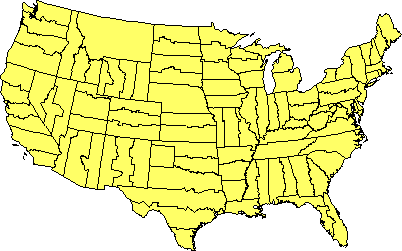

In [ ]:
import PIL.Image
img = PIL.Image.open('fig03.png').convert('RGB')
img

In [ ]:
response = model.generate_content(["Can you tell me what's the projection used in the following map?", img], stream=True)
response.resolve()
to_markdown(response.text)

In [ ]:
to_markdown(response.text)

>  The Albers equal-area conic projection is a map projection that is used to represent areas that are located between two latitudes. It is a compromise projection, which means that it does not distort the area of landmasses, but it does distort their shape. The Albers equal-area conic projection is often used to represent the United States, Canada, and other countries that are located in the mid-latitudes.

In [ ]:
to_markdown(response.text)

>  **Quadrant 1: Discrete-Smooth**
> - Dot map
> 
> **Quadrant 2: Discrete-Abrupt**
> - Choropleth map
> 
> **Quadrant 3: Continuous-Smooth**
> - Isopleth map
> 
> **Quadrant 4: Continuous-Abrupt**
> - Area class map